In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/combined_data/cleaned_data_1.csv')

In [3]:
df.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Random Forest

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
forest_reg=RandomForestRegressor()
forest_reg.fit(X_train,y_train)

/home/ind/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [9]:
f'Coefficient of determination R^2 on train set {forest_reg.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set 0.8902838219095'

In [10]:
f'Coefficient of determination R^2 on test set {forest_reg.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set 0.4222859880198122'

- Overfit Model

In [11]:
from sklearn.model_selection import cross_val_score
cvv_score = cross_val_score(forest_reg, X, y, cv = 3)

In [13]:
cvv_score.mean()

0.22199755607039992

In [14]:
forest_pred = forest_reg.predict(X_test)

In [15]:
forest_pred

array([ 65.775     , 173.55978261, 115.85410256,  48.54358974,
        42.90996377, 198.88478261,  63.69184783, 150.00958592,
        64.27916667, 188.945     ,  91.77916667, 171.18936594,
       233.2       ,  86.03647343,  62.92916667, 193.03581028,
        94.7625    ,  83.70833333, 181.49435818,  68.28568841,
        72.87607143,  88.13025362,  87.23333333, 228.77563406,
       127.3218254 ,  70.45512821, 223.67137681, 275.26394928,
        82.24640269, 181.05720238, 207.75978261,  92.08663234,
        77.78333333,  97.22805944,  49.17034314, 127.17110071,
       231.33845908,  83.42554348,  93.03240758,  70.20337382,
       180.7649793 , 186.40438596,  93.23647343,  36.50471014,
       165.2702193 ,  71.66666667,  51.91304348,  60.21904762,
       177.62900362, 226.46974638,  97.28942308, 222.37387681,
        83.93666667, 194.65833333, 105.1752193 , 256.49746377,
        78.64804348,  67.15416667,  66.45929487, 202.19810606,
        92.76688596,  70.46666667,  52.05754195, 222.73

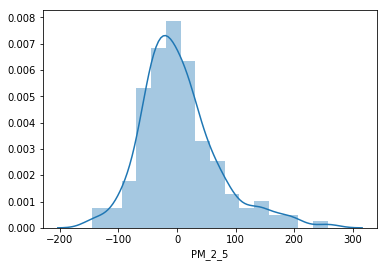

In [16]:
sns.distplot(y_test-forest_pred)

# Hyperparameter Tunning

In [21]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 10]
params = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
random_search = RandomizedSearchCV(forest_reg,params,scoring='neg_mean_squared_error',cv=5,n_iter=100,random_state=43,n_jobs=-1)
random_search.fit(X,y)

/home/ind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=43, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [24]:
print(random_search.best_params_)
print(random_search.best_estimator_)
print(random_search.best_score_)

{'n_estimators': 200, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
-3972.98196815672


In [25]:
hyper_pred = random_search.predict(X_test)

In [26]:
hyper_pred

array([ 73.11078029,  94.28309712,  67.08177464,  56.52422535,
        50.34805618, 198.15944812,  90.98017898, 115.23275654,
       125.17761994, 226.05942449,  91.07697451, 225.46013523,
       210.61489121,  86.09208984,  71.75879819, 212.32113905,
        79.81622324,  93.79329124, 211.82522261,  65.24235588,
       106.639894  ,  70.28831652, 108.0979625 , 195.92296541,
       100.04357958,  85.88743462, 195.05118208, 205.21443674,
        75.02632601, 217.00832538, 195.55879167,  92.07614313,
        90.37335745,  59.96592296,  66.12821597, 103.76546654,
       178.14873251,  76.12863964,  96.9509254 ,  76.85800037,
       206.0470529 , 139.10690433,  91.62177672,  64.32696624,
       179.88712566,  88.18967699,  93.36123109,  57.31707315,
       209.93156922, 210.58674326,  66.4700673 , 175.31153303,
        90.58443175, 195.66012321,  90.2556191 , 225.24631733,
        73.66100126,  69.54831102,  95.40691878, 211.88793304,
        83.72841756,  73.80333172,  58.93696411, 202.94

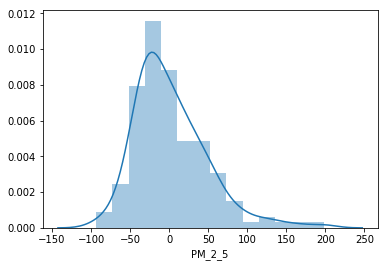

In [27]:
sns.distplot(y_test - hyper_pred)

In [28]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, hyper_pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, hyper_pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, hyper_pred))}")

Mean Abs Error: 35.40184182462589
Mean Sq Error: 2194.7027671862593
Root Mean Error: 46.84765487392362


In [30]:
import pickle
pickle.dump(random_search, open('Random_Forest.pkl', 'wb'))